About Yulu


Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily
commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest
commute solution through a user-friendly mobile app to enable shared, solo and sustainable
commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office
spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable,
and convenient!
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting
company to understand the factors on which the demand for these shared electric cycles depends.
Specifically, they want to understand the factors affecting the demand for these shared electric cycles
in the Indian market.

-> Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset


->Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)


->Select an appropriate test to check whether:
i)Working Day has effect on number of electric cycles rented
ii)No. of cycles rented similar or different in different seasons
iii)No. of cycles rented similar or different in different weather
iv)Weather is dependent on season (check between 2 predictor variable)


->Set up Null Hypothesis (H0)


->State the alternate hypothesis (H1)


->Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)


->Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary


->Set a significance level (alpha)


->Calculate test Statistics.


->Decision to accept or reject null hypothesis.


->Inference from the analysis

In [87]:
# importing libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# reading the data file -
df=pd.read_csv('bike_sharing.txt')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
df.shape

(10886, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Replacing the categories of workingday as working and non-working**

In [5]:
df['workingday'] = df['workingday'].replace({1: 'working', 0: 'non-working'})
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,non-working,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,non-working,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,non-working,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,non-working,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,non-working,1,9.84,14.395,75,0.0,0,1,1


Statistical Analysis

In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Checking and handling if any null values exist**

In [8]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no null values in any columns.

**Non-Graphical Analysis**

->**season**:
   season (1: spring, 2: summer, 3: fall,
   4:winter)

->**weather**:

  1: Clear, Few clouds, partly cloudy, partly cloudy

  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [12]:
df['season'].unique()

array([1, 2, 3, 4])

In [20]:
df['season'].value_counts(normalize=True)*100

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64

In [11]:
df['weather'].unique()

array([1, 2, 3, 4])

In [21]:
df['weather'].value_counts(normalize=True)*100

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

In [22]:
df['workingday'].value_counts(normalize=True)*100

1    68.087452
0    31.912548
Name: workingday, dtype: float64

In [23]:
df['holiday'].value_counts(normalize=True)*100

0    97.14312
1     2.85688
Name: holiday, dtype: float64

In [25]:
df['registered'].nunique()

731

In [19]:
df['casual'].nunique()

309

In [62]:
#plt.figure(figsize=(10,5))
workingday = sum(df[df['workingday']==1]['count'])
nonworkingday = sum(df[df['workingday']==0]['count'])
total = workingday+nonworkingday
perc_working = (workingday/total)*100
perc_nonworking = (nonworkingday/total)*100
print("counts_of_working_perc = ",perc_working)
print("counts_of_nonworking_perc = ",perc_nonworking)

counts_of_working_perc =  68.59843987655576
counts_of_nonworking_perc =  31.401560123444238


**number of vehicles being rent is more on working days.**

In [63]:
holidayday = sum(df[df['holiday']==1]['count'])
nonholidayday = sum(df[df['holiday']==0]['count'])
total = holidayday+nonholidayday
perc_holiday = (holidayday/total)*100
perc_nonholiday = (nonholidayday/total)*100
print("counts_of_holidayday_perc = ",perc_holiday)
print("counts_of_nonholidayday_perc = ",perc_nonholiday)

counts_of_holidayday_perc =  2.7719331222224564
counts_of_nonholidayday_perc =  97.22806687777754


**number of vehicles being rent on holidays are way less.**

In [65]:
weather_1 = sum(df[df['weather']==1]['count'])
weather_2 = sum(df[df['weather']==2]['count'])
weather_3 = sum(df[df['weather']==3]['count'])
weather_4 = sum(df[df['weather']==4]['count'])
total = weather_1+weather_2+weather_3+weather_4
perc_weather_1 = (weather_1/total)*100
perc_weather_2 = (weather_2/total)*100
perc_weather_3= (weather_3/total)*100
perc_weather_4 = (weather_4/total)*100
print("counts_of_weather_1_perc = ",perc_weather_1)
print("counts_of_weather_2_perc = ",perc_weather_2)
print("counts_of_weather_3_perc = ",perc_weather_3)
print("counts_of_weather_4_perc = ",perc_weather_4)

counts_of_weather_1_perc =  70.77823000600343
counts_of_weather_2_perc =  24.318668735578832
counts_of_weather_3_perc =  4.895237346294083
counts_of_weather_4_perc =  0.00786391212365906


**More number of vehicles are being rented in the type 1 weather(Clear, Few clouds, partly cloudy, partly cloudy).**

In [67]:
climate_1 = sum(df[df['season']==1]['count'])
climate_2 = sum(df[df['season']==2]['count'])
climate_3 = sum(df[df['season']==3]['count'])
climate_4 = sum(df[df['season']==4]['count'])
total = climate_1+climate_2+ climate_3+climate_4
perc_climate_1 = (climate_1/total)*100
perc_climate_2 = (climate_2/total)*100
perc_climate_3= (climate_3/total)*100
perc_climate_4 = (climate_4/total)*100
print("counts_of_season_1_perc = ",perc_climate_1)
print("counts_of_season_2_perc = ",perc_climate_2)
print("counts_of_season_3_perc = ",perc_climate_3)
print("counts_of_season_4_perc = ",perc_climate_4)

counts_of_season_1_perc =  14.984492748897612
counts_of_season_2_perc =  28.20852409713658
counts_of_season_3_perc =  30.72018090833939
counts_of_season_4_perc =  26.086802245626416


**More number of vehicles are being rented in the type 3 and 2 seasons(2: summer, 3: fall).**

**Graphical Analysis**

<Axes: xlabel='workingday', ylabel='count'>

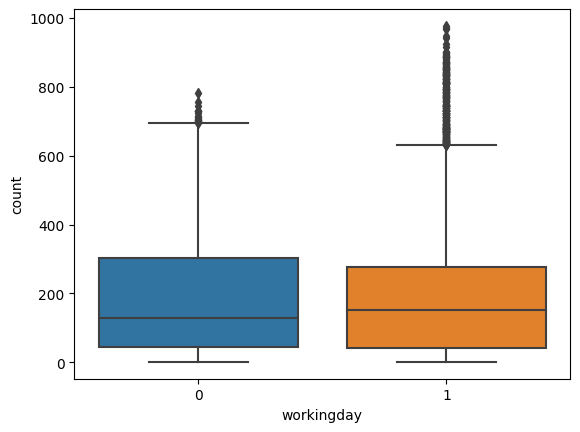

In [31]:
sns.boxplot(data=df, x='workingday', y='count')

On Working days, there are more outliers.

<Axes: xlabel='holiday', ylabel='count'>

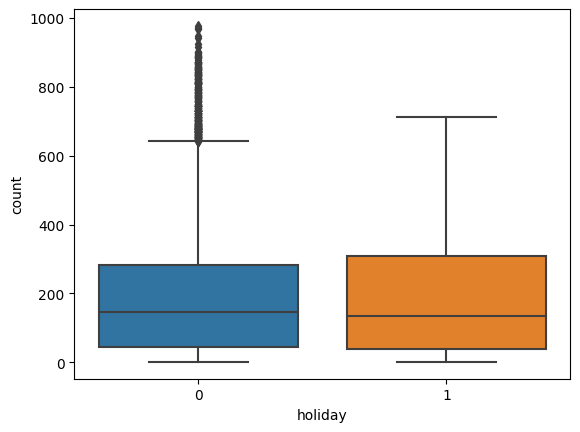

In [69]:
sns.boxplot(data=df, x='holiday', y='count')

<Axes: xlabel='workingday', ylabel='count'>

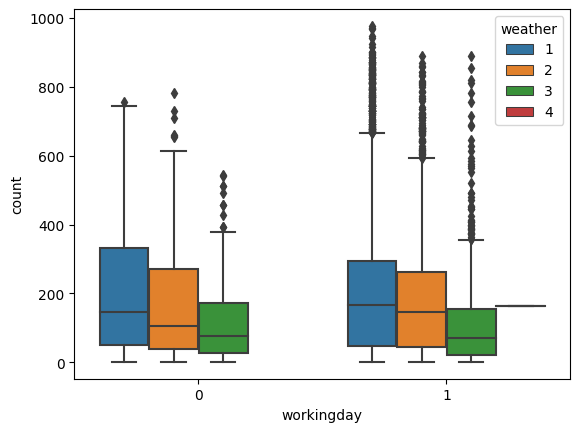

In [71]:
sns.boxplot(data=df, x='workingday', y='count',hue='weather')

Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

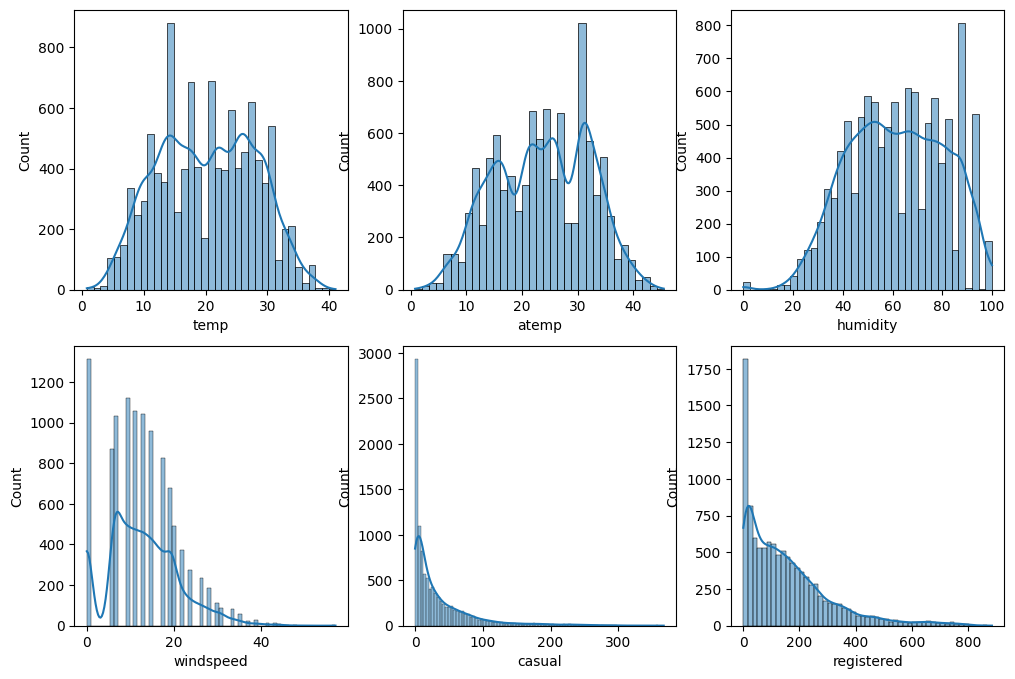

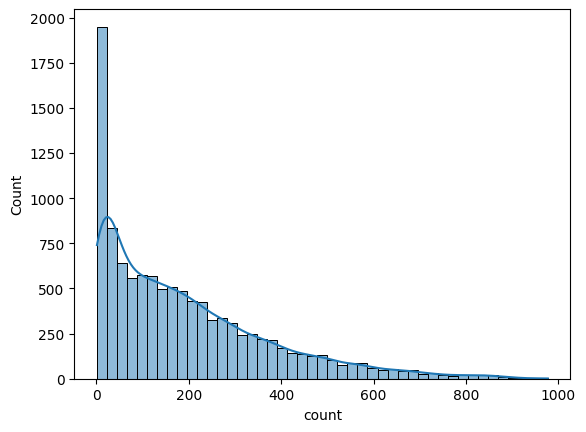

In [74]:
# understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual',
'registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
index = 0
for row in range(2):
  for col in range(3):
    sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
    index += 1
plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

 casual, registered and count somewhat looks like Log Normal
Distribution

 temp, atemp and humidity looks like they follows the Normal Distribution

 windspeed follows the binomial distribution

<ipython-input-85-9e6a0fc25174>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['count']
<ipython-input-85-9e6a0fc25174>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


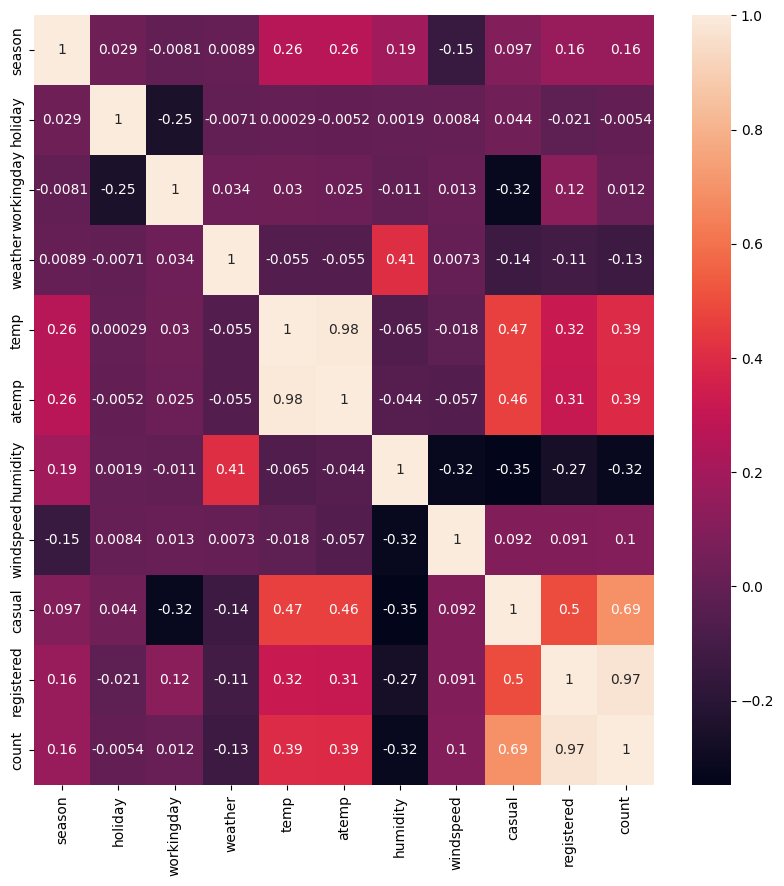

In [85]:
# understanding the correlation between count and numerical variables
df.corr()['count']
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Positive correlation is measured on a 0.1 to 1.0 scale. Weak positive correlation would be in the range of 0.1 to 0.3, moderate positive correlation from 0.3 to 0.5, and strong positive correlation from 0.5 to 1.0.



---



#**Hypothesis Testing**

1: **2-Sample T-Test** to check if Working Day has an effect on the number of electric cycles rented :





**Null Hypothesis**: Working day has no effect on the number of cycles being rented.

**Alternate Hypothesis**: Working day has effect on the number of cycles being
rented.

**Significance level (alpha)**: 0.05

We will use the **2-Sample T-Test** to test the hypothesis defined above

Before conducting the two-sample T-Test we need to find if the given data groups have
the same variance. If the ratio of the larger data groups to the small data group is less
than 4:1 then we can consider that the given data groups have equal variance.

In [86]:
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values
print(np.var(data_group1), np.var(data_group2))
np.var(data_group2)// np.var(data_group1)

30171.346098942427 34040.69710674686


1.0

Here, the ratio is 34040.70 / 30171.35 which is less than 4:1

In [88]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

TtestResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

Since pvalue is greater than 0.05 so we cannot reject the Null hypothesis. We don't
have the sufficient evidence to say that working day has effect on the number of
cycles being rented.



---

2: **ANNOVA** to check if No. of cycles rented is similar or different in
different 1. weather 2. Season


**Null Hypothesis**: Number of cycles rented is similar in different weather and
season.

**Alternate Hypothesis**: Number of cycles rented is not similar in different
weather and season.

**Significance level (alpha)**: 0.05

In [112]:
from statsmodels.graphics.gofplots import qqplot
g1 = df[df["weather"]==1]["count"]
g2 = df[df["weather"]==2]["count"]
g3 = df[df["weather"]==3]["count"]
g4 = df[df["weather"]==4]["count"]
g5 = df[df["season"]==1]["count"]
g6 = df[df["season"]==2]["count"]
g7 = df[df["season"]==3]["count"]
g8 = df[df["season"]==4]["count"]
groups = [g1,g2,g3,g4,g5,g6,g7,g8]

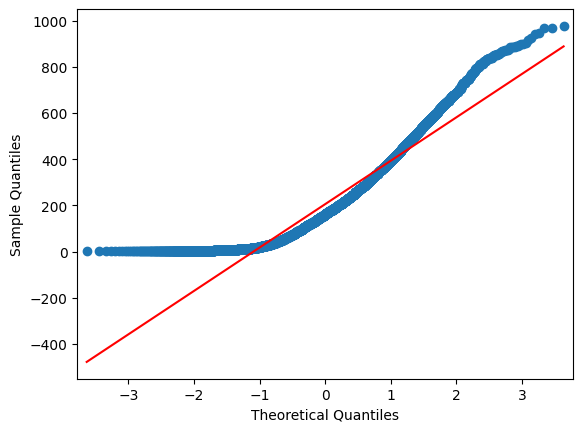

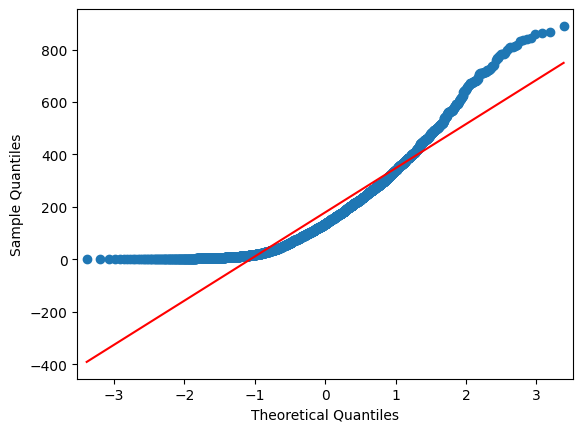

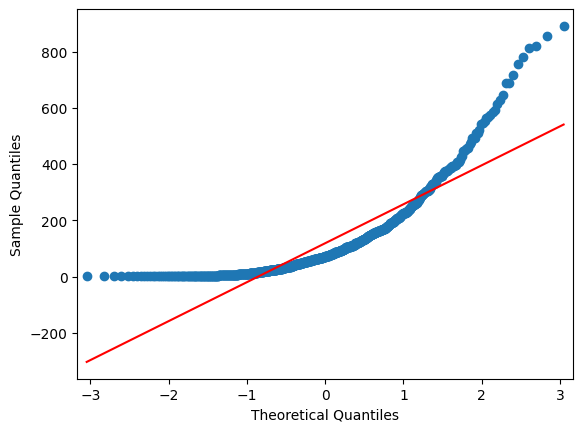

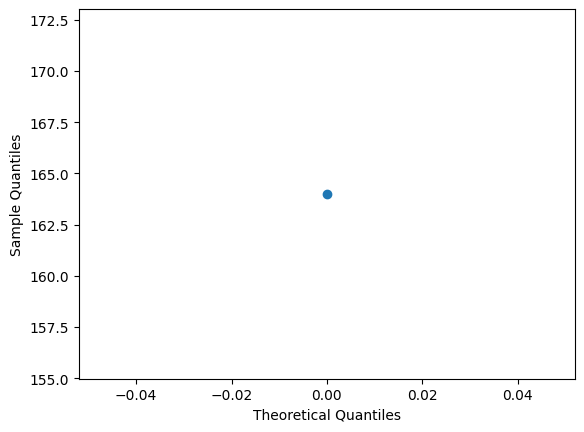

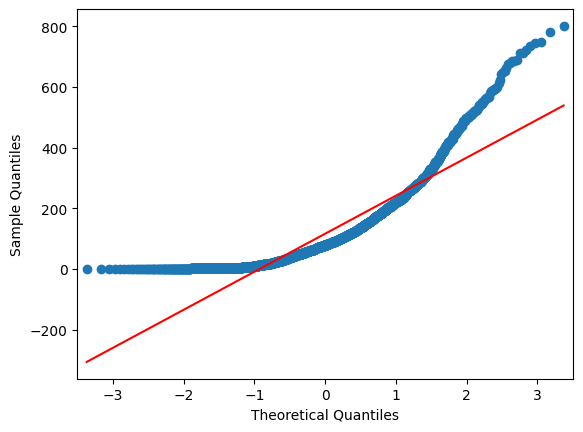

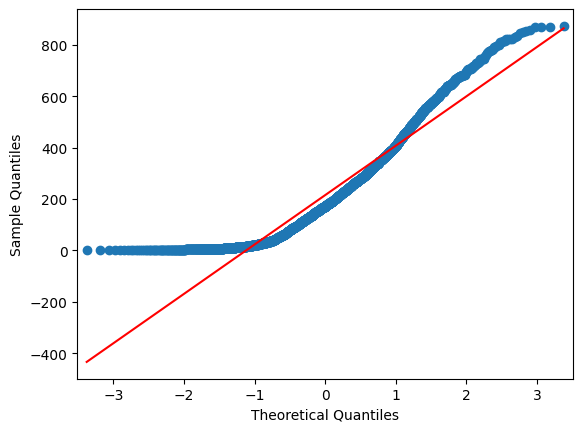

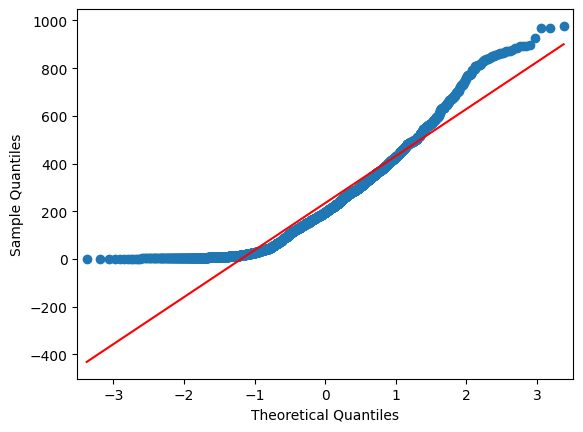

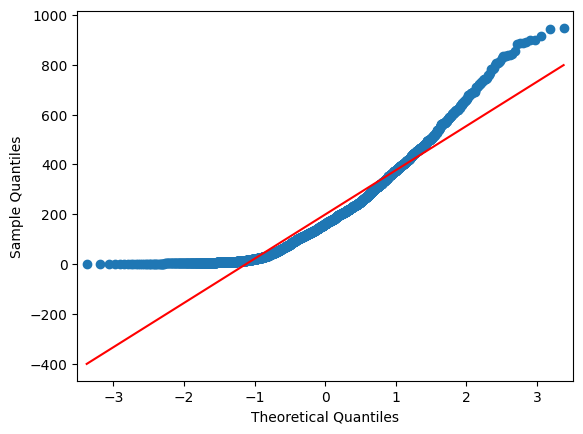

In [122]:
index = 0
for row in range(4):
  for col in range(2):
    qqplot(groups[index], line="s")
    index += 1
plt.show()

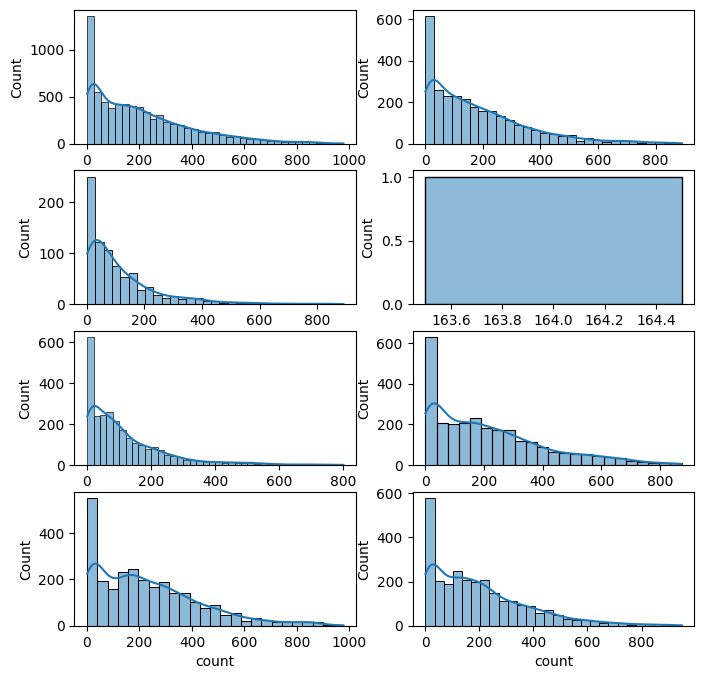

In [117]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))
index = 0
for row in range(4):
  for col in range(2):
    sns.histplot(groups[index], ax=axis[row, col], kde=True)
    index += 1
plt.show()

As per above graphs, all groups are not following Gaussian distribution

**Equal variance: Levene's Test**

In [126]:
#Null Hypothesis: Variances is similar in different weather and season.
#Alternate Hypothesis: Variances is not similar in different weather and season.
#Significance level (alpha): 0.05
levene_stat, p_value = stats.levene(g1,g2,g3,g4,g5,g6,g7,g8)
print(p_value)
if p_value < 0.05:
  print("Reject the Null hypothesis.Variances are not equal")
else:
  print("Fail to Reject the Null hypothesis.Variances are equal")

3.463531888897594e-148
Reject the Null hypothesis.Variances are not equal


**As per QQ plot and Levene's Test, We cannot ANOVA Test.**

**Assumptions of ANOVA fail, use Kruskal**

In [132]:
#assumptions of ANOVA don't hold, we need Kruskal Wallis
kruskal_stat, p_value = stats.kruskal(g1,g2,g3,g4,g5,g6,g7,g8)
print("p_value===",p_value)
if p_value<0.05:
  print("Since p-value is less than 0.05, we reject the null hypothesis. So, Number of cycles rented is not similar in different weather and season conditions")
else:
  print("Fail to Reject the Null hypothesis.So Number of cycles rented is similar in different weather and season conditions")

p_value=== 4.614440933900297e-191
Since p-value is less than 0.05, we reject the null hypothesis. So, Number of cycles rented is not similar in different weather and season conditions




---



3: **Chi-square test to check if Weather is dependent on the season**

**Null Hypothesis (H0)**: Weather is independent of the season

**Alternate Hypothesis (H1)**: Weather is not independent of the season

**Significance level (alpha)**: 0.05

In [94]:
data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [99]:
stats.chi2_contingency([[1759,715,211,1],[1809,708,224,0],[1930,604,199,0],[1702,807,225,0]])

Chi2ContingencyResult(statistic=49.14497686018436, pvalue=1.5591078623358725e-07, dof=9, expected_freq=array([[1.77521572e+03, 6.98744630e+02, 2.11793097e+02, 2.46557738e-01],
       [1.81156600e+03, 7.13052506e+02, 2.16129888e+02, 2.51606389e-01],
       [1.80627869e+03, 7.10971360e+02, 2.15499082e+02, 2.50872040e-01],
       [1.80693960e+03, 7.11231504e+02, 2.15577933e+02, 2.50963833e-01]]))

Since **p-value(1.5591078623358725e-07)** is less than the **alpha 0.05**, We reject the Null Hypothesis.

Meaning that **Weather is dependent on the season**.



---



**Recommendations:**


1: In summer and fall seasons the company should have more bikes in stock to be
rented. Because the demand in these seasons is higher as compared to other
seasons.

2: With a significance level of 0.05, workingday has no effect on the number of bikes being rented.

3: In very low humid days, company should have less bikes in the stock to be rented.

4: Whenever temperature is less than 10 or in very cold days, company should have less bikes.

5: Whenever the windspeed is greater than 35 or in thunderstorms, company should
have less bikes in stock to be rented.



---

